In [400]:
import numpy as np
import pandas as pd

In [401]:
data = pd.read_csv("happiness_score_dataset.csv")
data.columns = ['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual']

In [402]:
print(data.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


In [403]:
data =data.sort_values(by = ['Country'])
data = data.drop(columns=['Happiness Score','Standard Error','Dystopia Residual'])
data = data.reset_index()

In [404]:
countries = list(set(data['Country'].values))
countries = sorted(countries)

In [405]:
new_regions = []
for i in range(len(countries)):
        country_index = np.where(data['Country'] == countries[i])
        current_country_data = data.iloc[country_index]
        if all(pd.isnull(current_country_data['Region'].values)):
            country_index = np.where(data['Country'] == countries[i])[0]
            for vals in country_index:
                try:
                    data = data.drop(index = vals)
                except KeyError:
                    pass
        else:
            region_name_pos = np.where([type(x) == str for x in current_country_data['Region'].values])[0][0]
            region = current_country_data['Region'].values[region_name_pos]
            current_country_data = current_country_data.replace(np.nan, region)
            new_regions.append(current_country_data['Region'].values)

In [406]:
new_regions = list(new_regions)
k = 0
region_vals = []
for arr in new_regions:
    for vals in arr:
        region_vals.append(vals)
        k+=1
        
len(region_vals)

158

In [407]:
data['Region'] = region_vals

In [408]:
data.head(20)

,index,Country,Region,Happiness Rank,Economy,Family,Health,Freedom,Trust,Generosity
0,152,Afghanistan,Southern Asia,153,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510
1,94,Albania,Central and Eastern Europe,95,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272
2,67,Algeria,Middle East and Northern Africa,68,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822
3,136,Angola,Sub-Saharan Africa,137,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344
4,29,Argentina,Latin America and Caribbean,30,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451
5,126,Armenia,Central and Eastern Europe,127,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855
6,9,Australia,Australia and New Zealand,10,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562
7,12,Austria,Western Europe,13,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088
8,79,Azerbaijan,Central and Eastern Europe,80,1.02389,0.93793,0.64045,0.37030,0.16065,0.07799
9,48,Bahrain,Middle East and Northern Africa,49,1.32376,1.21624,0.74716,0.45492,0.30600,0.17362


In [409]:
one_hot_regions = pd.get_dummies(data['Region'],prefix = 'Region')

In [410]:
data = data.join(one_hot_regions)

In [411]:
data = data.drop(columns = 'Region')

In [412]:
data

,index,Country,Happiness Rank,Economy,Family,Health,Freedom,Trust,Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,152,Afghanistan,153,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,0,0,0,0,0,0,0,1,0,0
1,94,Albania,95,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,0,1,0,0,0,0,0,0,0,0
2,67,Algeria,68,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,0,0,0,0,1,0,0,0,0,0
3,136,Angola,137,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,0,0,0,0,0,0,0,0,1,0
4,29,Argentina,30,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,Venezuela,23,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,0,0,0,1,0,0,0,0,0,0
154,74,Vietnam,75,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,0,0,0,0,0,0,1,0,0,0
155,135,Yemen,136,0.54649,0.68093,0.40064,0.35571,0.07854,0.09131,0,0,0,0,1,0,0,0,0,0
156,84,Zambia,85,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,0,0,0,0,0,0,0,0,1,0


In [413]:
happiness_benchmark = []
for rank in data['Happiness Rank'].values:
    if rank <= 20:
        happiness_benchmark.append(1)
    else:
        happiness_benchmark.append(0)
data['Happiness Rank'] = happiness_benchmark
data=data.sample(frac=1)

In [414]:
data = data.drop(columns = ['Country', 'index'])

In [415]:
data = data.dropna(axis=0)
output = data['Happiness Rank']

In [416]:
data = data.drop(columns = ['Happiness Rank'])

In [417]:
data.isnull().values.any()

False

In [418]:
data.describe()

,Economy,Family,Health,Freedom,Trust,Generosity,Region_Australia and New Zealand,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,0.012658,0.183544,0.037975,0.139241,0.126582,0.012658,0.056962,0.044304,0.253165,0.132911
std,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.112150,0.388343,0.191743,0.347298,0.333562,0.112150,0.232507,0.206423,0.436207,0.340558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000
max,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [419]:
n = len(data)
percent = int(0.8 * n)

In [420]:
features = data.columns
x = data[list(features)][:percent]
y = output[:percent]

In [421]:
x_test = data[list(features)][percent:]
y_test = output[percent:]

In [422]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [423]:
rfc = RandomForestClassifier()
logit = LogisticRegression()

In [424]:
rfc.fit(x,y)
logit.fit(x,y)

LogisticRegression()

In [425]:
accuracies = []
for i in np.arange(1,4):
    max_depth = i
    print('max_depth :', i)
    dtc = DecisionTreeClassifier(max_depth = max_depth)
    dtc.fit(x,y)
    pred = dtc.predict(x_test)
    print(accuracy_score(y_true = y_test, y_pred = pred))
    accuracies.append(accuracy_score(y_true = y_test, y_pred = pred))
best = np.max(accuracies)
best_depth = np.where(accuracies == best)[0][0]

dtc = DecisionTreeClassifier(max_depth = best_depth)
dtc.fit(x,y)

max_depth : 1
0.875
max_depth : 2
0.90625
max_depth : 3
0.875


DecisionTreeClassifier(max_depth=1)

[Text(1116.0, 1549.2599999999998, 'Freedom <= 0.615\ngini = 0.233\nsamples = 126\nvalue = [109, 17]\nclass = Not Top 20'),
 Text(558.0, 516.4200000000001, 'gini = 0.069\nsamples = 111\nvalue = [107, 4]\nclass = Not Top 20'),
 Text(1674.0, 516.4200000000001, 'gini = 0.231\nsamples = 15\nvalue = [2, 13]\nclass = Top 20')]

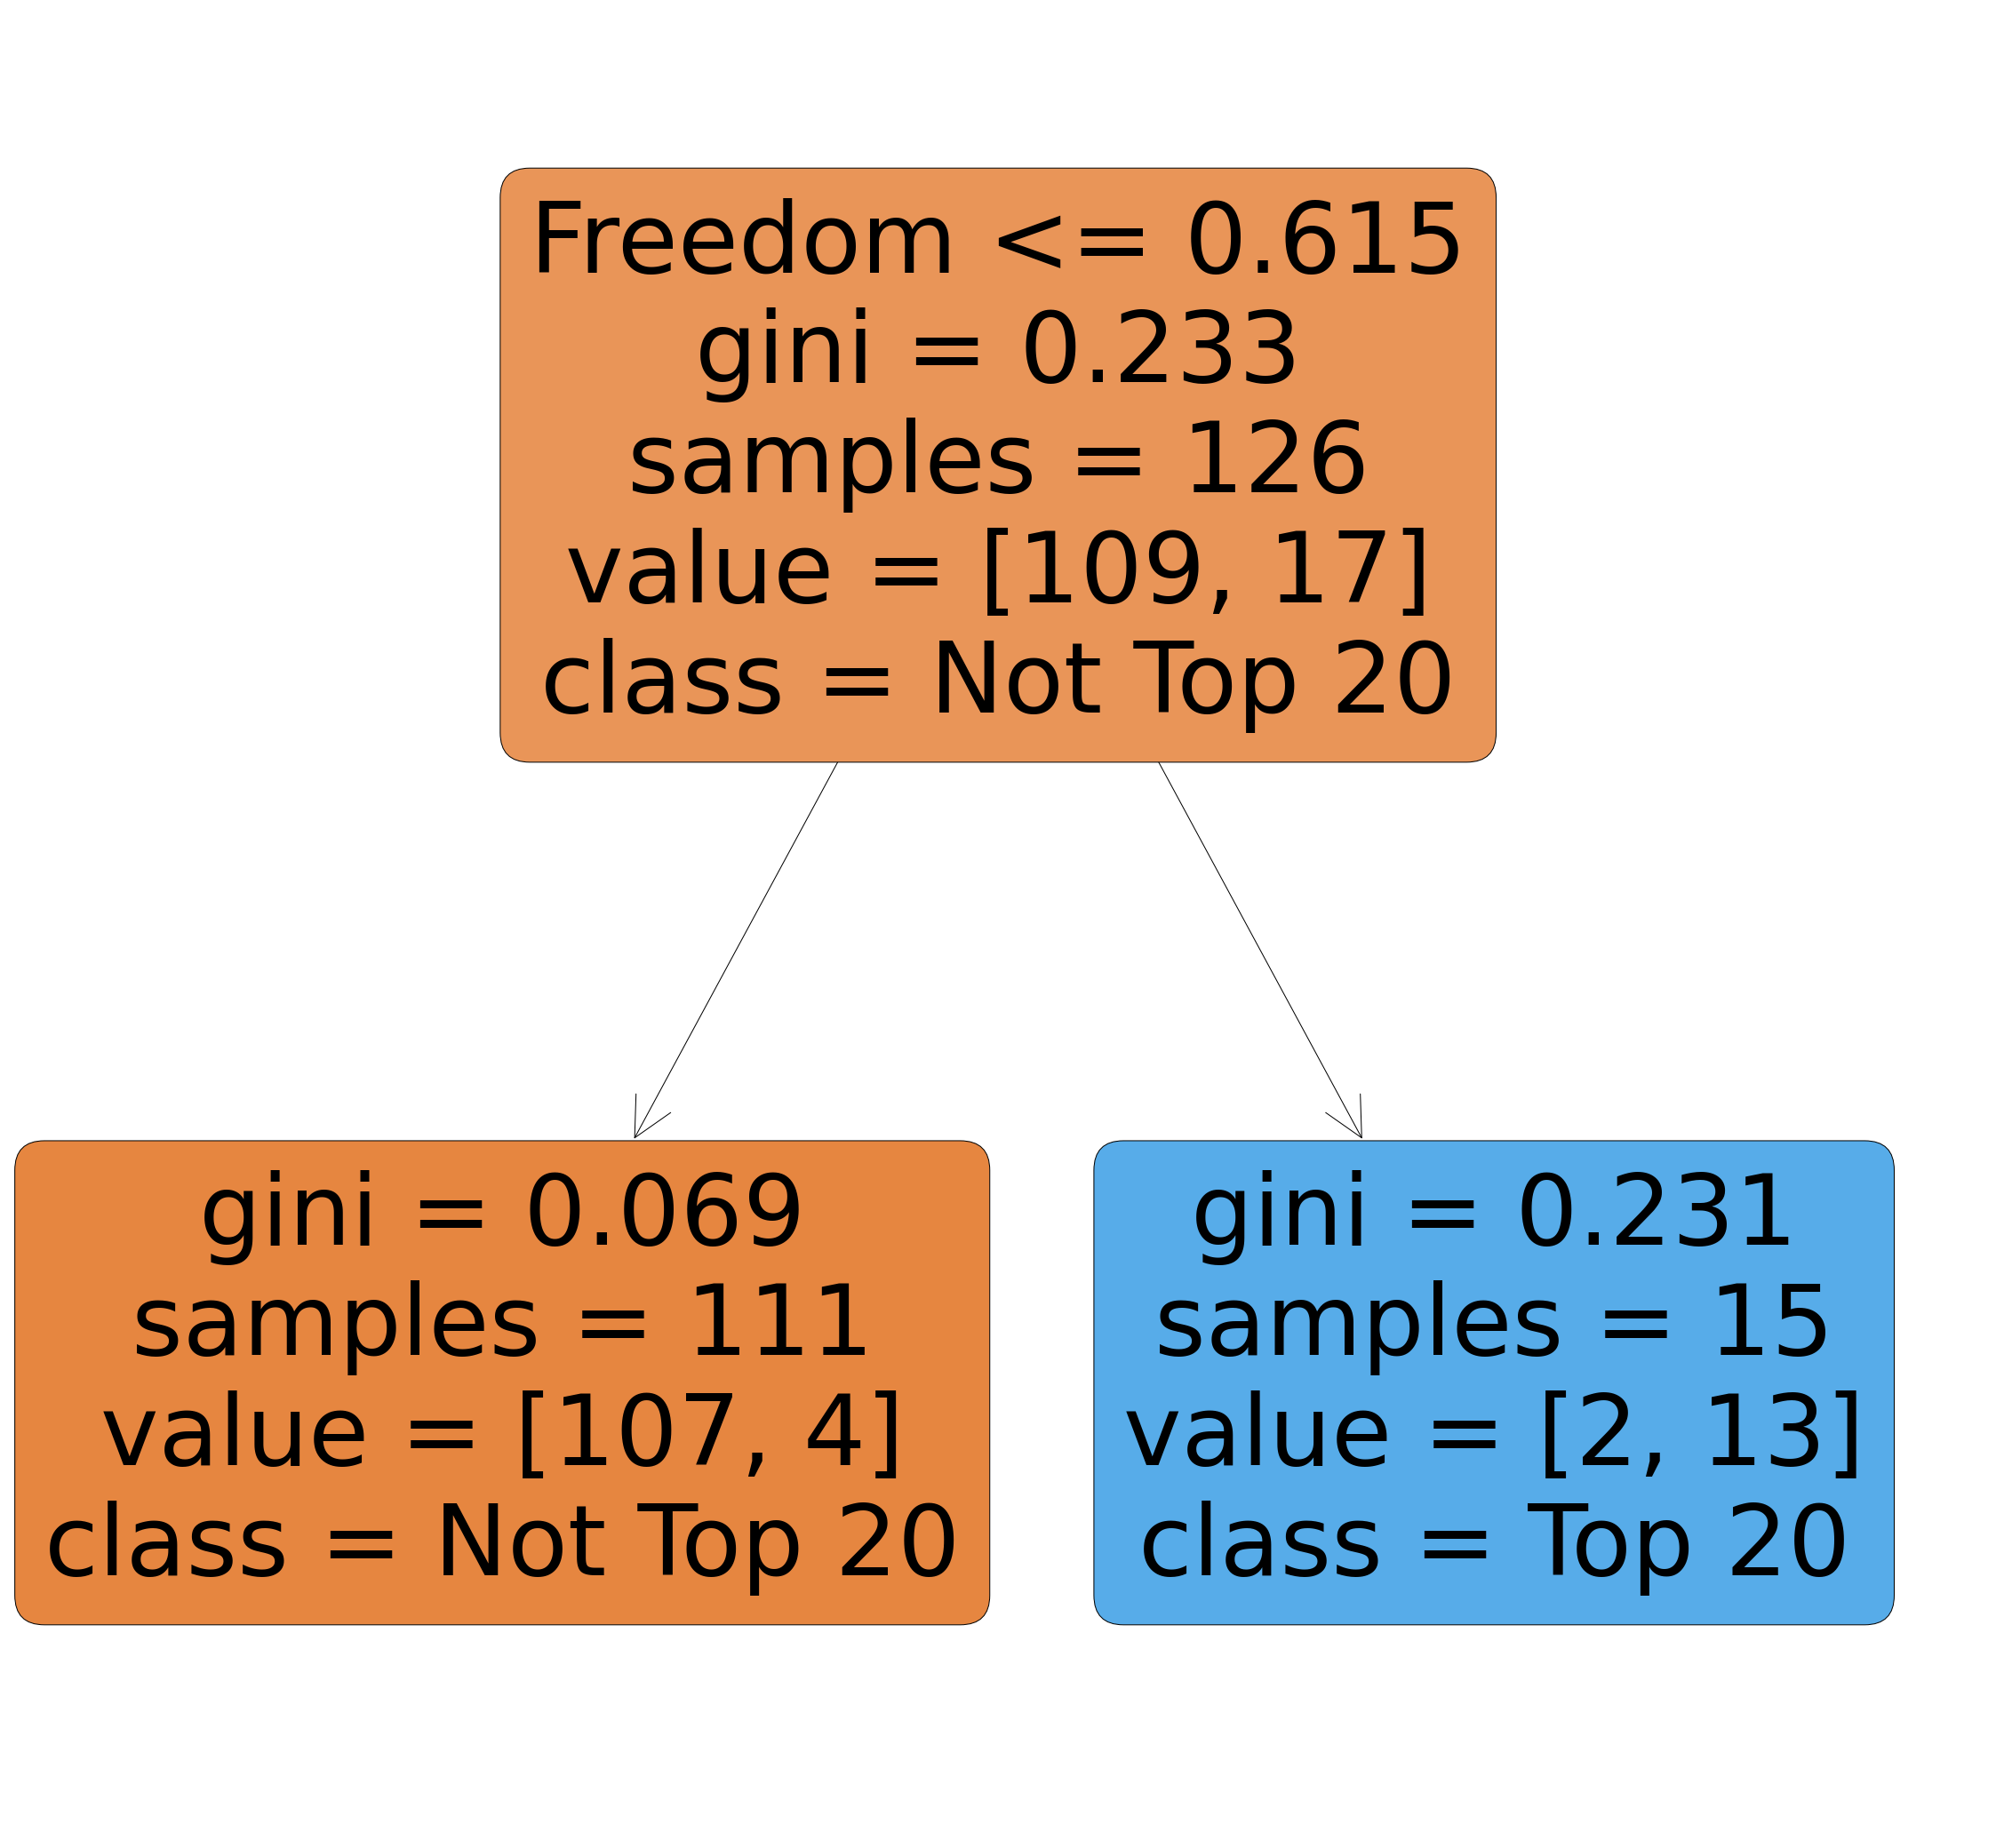

In [426]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,38))
plot_tree(dtc, feature_names = features, class_names = ['Not Top 20', 'Top 20'],
          filled=True, rounded = True)

In [427]:
preds_dtc = dtc.predict(x_test)
preds_rfc = rfc.predict(x_test)
preds_logit = logit.predict(x_test)

In [428]:
accuracy_score(y_true = y_test, y_pred = preds_dtc)

0.875

In [429]:
accuracy_score(y_true = y_test, y_pred = preds_rfc)

0.9375

In [430]:
accuracy_score(y_true = y_test, y_pred = preds_logit)

0.9375

Testing a prediction with sample

In [431]:
data = {
       'Economy (GDP per Capita)':1.68, 'Family':1.4, 'Health (Life Expectancy)':0.7,
       'Freedom':0.2, 'Trust (Government Corruption)':0.12, 'Generosity':0.6,
       'Region_Australia and New Zealand':1, 'Region_Central and Eastern Europe':0,
       'Region_Eastern Asia':0, 'Region_Latin America and Caribbean':0,
       'Region_Middle East and Northern Africa':0, 'Region_North America':0,
       'Region_Southeastern Asia':0, 'Region_Southern Asia':0,
       'Region_Sub-Saharan Africa':0, 'Region_Western Europe':0,
}
x_test_new = pd.DataFrame(data=data, index = [0])

In [432]:
dtc.predict(x_test_new)

array([0], dtype=int64)

Output 0 implies that the country in not amongst top 20 happy countries